**Anggota Kelompok**


*   Erawan Faqih Ibrahim (5026211001)
*   I Gusti Agung Jaya Hiswara (5026211122)
*   Muhammad Afaf (5026221157)
*   Candleline Audrina Firsta (5026221159)

In [1]:
# Impelementasi dan Eksperimen Prediksi Jenis Kejahatan menggunakan Python untuk Data 
# Kejahatan di Los Angeles 

In [2]:
# Langkah 1: Import Library yang Diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Cleaned Data
import pandas as pd
df = pd.read_csv('Cleaned_Crime_Data.csv')

df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,LOCATION
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,0.0,Unknown,AA,Adult Arrest,34.0375,-118.3506,1900 S LONGWOOD AV
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),0.0,Unknown,IC,Invest Cont,34.0444,-118.2628,1000 S FLOWER ST
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,Unknown,IC,Invest Cont,34.0210,-118.3002,1400 W 37TH ST
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,0.0,Unknown,IC,Invest Cont,34.1576,-118.4387,14000 RIVERSIDE DR
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,354,THEFT OF IDENTITY,28,M,H,102.0,SIDEWALK,0.0,Unknown,IC,Invest Cont,34.0944,-118.3277,1900 TRANSIENT


In [4]:
# 1. Tinjauan Awal Dataset
# Periksa jumlah baris dan kolom serta beberapa contoh data
print("Dimensi dataset:", df.shape)
df.head()

Dimensi dataset: (976232, 20)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,LOCATION
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,0.0,Unknown,AA,Adult Arrest,34.0375,-118.3506,1900 S LONGWOOD AV
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),0.0,Unknown,IC,Invest Cont,34.0444,-118.2628,1000 S FLOWER ST
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,Unknown,IC,Invest Cont,34.0210,-118.3002,1400 W 37TH ST
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,0.0,Unknown,IC,Invest Cont,34.1576,-118.4387,14000 RIVERSIDE DR
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,354,THEFT OF IDENTITY,28,M,H,102.0,SIDEWALK,0.0,Unknown,IC,Invest Cont,34.0944,-118.3277,1900 TRANSIENT


In [5]:
# 2. Cek Informasi Data
# Lihat tipe data, jumlah nilai non-null, dan ringkasan tipe data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976232 entries, 0 to 976231
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           976232 non-null  int64  
 1   Date Rptd       976232 non-null  object 
 2   DATE OCC        976232 non-null  object 
 3   TIME OCC        976232 non-null  int64  
 4   AREA            976232 non-null  int64  
 5   AREA NAME       976232 non-null  object 
 6   Crm Cd          976232 non-null  int64  
 7   Crm Cd Desc     976232 non-null  object 
 8   Vict Age        976232 non-null  int64  
 9   Vict Sex        976232 non-null  object 
 10  Vict Descent    976232 non-null  object 
 11  Premis Cd       976232 non-null  float64
 12  Premis Desc     976232 non-null  object 
 13  Weapon Used Cd  976232 non-null  float64
 14  Weapon Desc     976232 non-null  object 
 15  Status          976231 non-null  object 
 16  Status Desc     976232 non-null  object 
 17  LAT       

In [6]:
# 3. Mengecek Nilai yang Hilang
# Hitung jumlah nilai null di setiap kolom
missing_values = df.isnull().sum()
print("Nilai yang hilang per kolom:\n", missing_values)

Nilai yang hilang per kolom:
 DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            1
Status Desc       0
LAT               0
LON               0
LOCATION          0
dtype: int64


In [7]:
# 4. Mengecek Nilai Duplikat
# Periksa apakah terdapat baris yang duplikat
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


In [8]:
# 5. Statistik Deskriptif
# Lihat statistik deskriptif untuk mengidentifikasi outlier atau inkonsistensi
df.describe(include='all')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LAT,LON,LOCATION
count,9.762320e+05,976232,976232,976232.000000,976232.000000,976232,976232.000000,976232,976232.000000,976232,976232,976232.000000,976232,976232.000000,976232,976231,976232,976232.000000,976232.000000,976232
unique,NaN,1721,1721,NaN,NaN,21,NaN,140,NaN,3,21,NaN,307,NaN,80,6,6,NaN,NaN,66180
top,NaN,02/02/2023 12:00:00 AM,01/01/2020 12:00:00 AM,NaN,NaN,Central,NaN,VEHICLE - STOLEN,NaN,M,H,NaN,STREET,NaN,Unknown,IC,Invest Cont,NaN,NaN,800 N ALAMEDA ST
freq,NaN,929,1149,NaN,NaN,67245,NaN,109840,NaN,394652,291043,NaN,251837,NaN,651118,779127,779127,NaN,NaN,2501
mean,2.196821e+08,NaN,NaN,1338.909600,10.703054,NaN,500.411038,NaN,29.123662,NaN,NaN,306.077383,NaN,121.135091,NaN,NaN,NaN,34.074155,-118.354673,NaN
std,1.290368e+07,NaN,NaN,651.943339,6.107098,NaN,206.172129,NaN,21.960076,NaN,NaN,218.906040,NaN,185.710473,NaN,NaN,NaN,0.111209,0.104457,NaN
min,8.170000e+02,NaN,NaN,1.000000,1.000000,NaN,110.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,33.705900,-118.667600,NaN
25%,2.106081e+08,NaN,NaN,900.000000,5.000000,NaN,331.000000,NaN,0.000000,NaN,NaN,101.000000,NaN,0.000000,NaN,NaN,NaN,34.014900,-118.430900,NaN
50%,2.208131e+08,NaN,NaN,1420.000000,11.000000,NaN,442.000000,NaN,30.000000,NaN,NaN,203.000000,NaN,0.000000,NaN,NaN,NaN,34.059200,-118.322900,NaN
75%,2.309117e+08,NaN,NaN,1900.000000,16.000000,NaN,626.000000,NaN,44.000000,NaN,NaN,501.000000,NaN,310.000000,NaN,NaN,NaN,34.164900,-118.274000,NaN


In [9]:
# 6. Visualisasi Distribusi Fitur
# Memvisualisasikan distribusi fitur numerik dan kategorikal
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

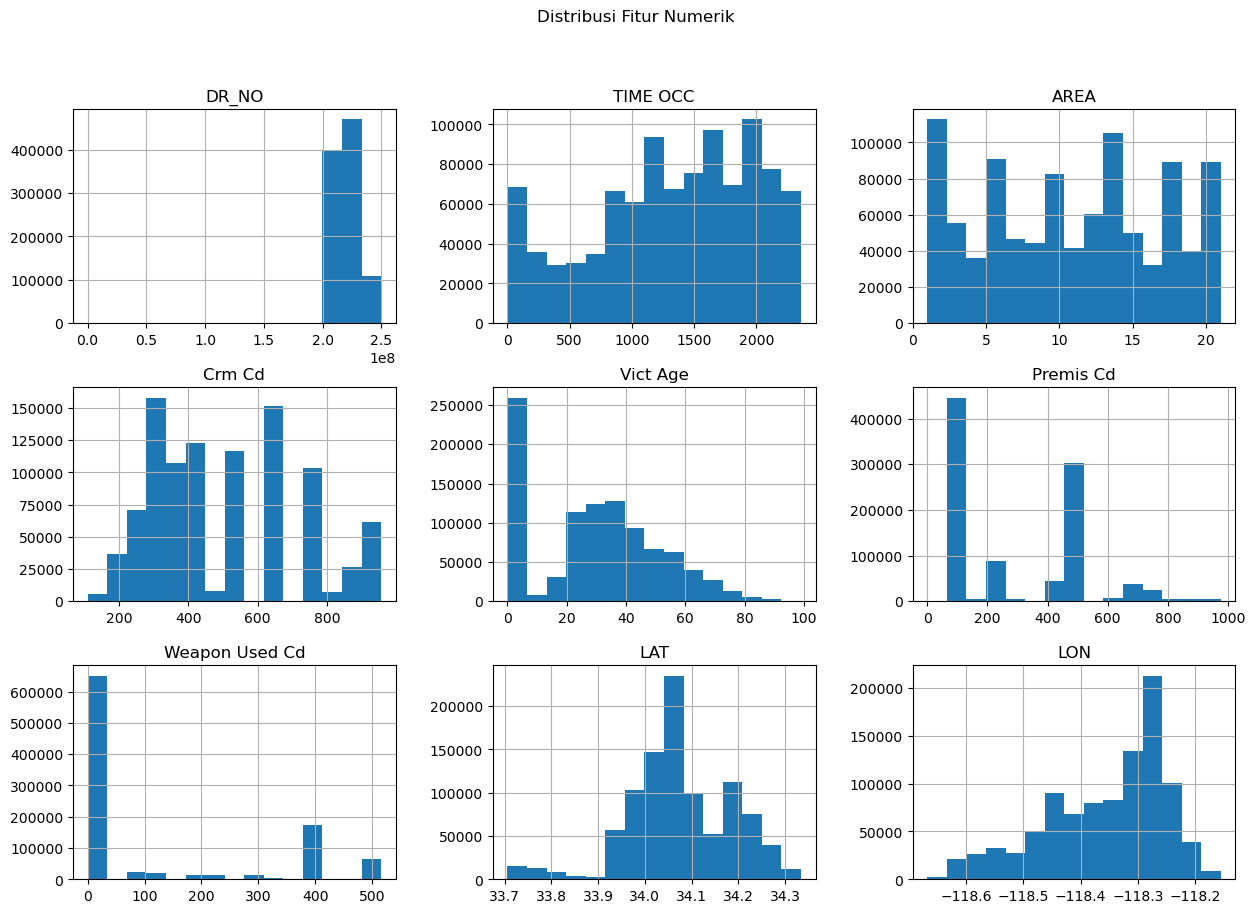

In [10]:
# Histogram untuk fitur numerik
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()


In [11]:
# 7. Mengecek Konsistensi Kategori
# Periksa keseragaman pada kolom kategorikal (misalnya 'Premis Desc')
for col in categorical_features:
    unique_values = df[col].nunique()
    print(f"{col} memiliki {unique_values} kategori unik.")

Date Rptd memiliki 1721 kategori unik.
DATE OCC memiliki 1721 kategori unik.
AREA NAME memiliki 21 kategori unik.
Crm Cd Desc memiliki 140 kategori unik.
Vict Sex memiliki 3 kategori unik.
Vict Descent memiliki 21 kategori unik.
Premis Desc memiliki 307 kategori unik.
Weapon Desc memiliki 80 kategori unik.
Status memiliki 6 kategori unik.
Status Desc memiliki 6 kategori unik.
LOCATION memiliki 66180 kategori unik.


In [12]:
# 8. Mengatasi Missing Values atau Outliers (Jika Diperlukan)
# Mengisi atau menghapus nilai hilang
# Contoh sederhana untuk menghapus baris dengan missing values
df = df.dropna()

In [13]:
# Hapus duplikasi
df = df.drop_duplicates()
print("Dimensi dataset setelah mengatasi missing values dan duplikasi:", df.shape)


Dimensi dataset setelah mengatasi missing values dan duplikasi: (976231, 20)


In [14]:
# 9. Verifikasi Data Siap
# Memastikan tidak ada missing values atau duplikasi setelah pembersihan
print("Nilai yang hilang per kolom setelah pembersihan:\n", df.isnull().sum())
print(f"Jumlah baris duplikat setelah pembersihan: {df[df.duplicated()].shape[0]}")

Nilai yang hilang per kolom setelah pembersihan:
 DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LAT               0
LON               0
LOCATION          0
dtype: int64
Jumlah baris duplikat setelah pembersihan: 0


# Transform Data

In [15]:
# Date Rptd dan DATE OCC (1721 kategori unik masing-masing):
# Kolom ini tampaknya berbentuk tanggal, tetapi dengan jumlah kategori unik yang tinggi, yang bisa menyulitkan pemodelan jika digunakan langsung.
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])  # Use the correct column name
df['Year Occ'] = df['DATE OCC'].dt.year
df['Month Occ'] = df['DATE OCC'].dt.month
df['Day Occ'] = df['DATE OCC'].dt.day
df.drop(columns=['DATE OCC'], inplace=True)  # Use the correct column name

/var/folders/ft/5yvhz_g95kq24x3zxwvjp1t80000gn/T/ipykernel_13386/1489439968.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])  # Use the correct column name


In [16]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])  # Use the correct column name
df['Year Rptd'] = df['Date Rptd'].dt.year
df['Month Rptd'] = df['Date Rptd'].dt.month
df['Day Rptd'] = df['Date Rptd'].dt.day
df.drop(columns=['Date Rptd'], inplace=True)  # Use the correct column name

/var/folders/ft/5yvhz_g95kq24x3zxwvjp1t80000gn/T/ipykernel_13386/527142677.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])  # Use the correct column name


In [17]:
# LOCATION (66,180 kategori unik):
# Lokasi ini kemungkinan berupa alamat atau titik lokasi yang spesifik, yang akan memiliki terlalu banyak variasi untuk digunakan dalam model secara langsung.

df.drop(columns=['LOCATION'], inplace=True)  # Use the correct column name


In [18]:
# Premis Desc (307 kategori unik):
# Coba lakukan pengelompokan berdasarkan kesamaan makna, misalnya, menggabungkan kategori terkait rumah tinggal atau area bisnis menjadi satu kategori yang lebih umum. Anda juga dapat menerapkan encoding (seperti target encoding atau frequency encoding).

# Mengelompokkan kategori yang serupa
df['Premis Desc'] = df['Premis Desc'].str.lower()

# Frequency Encoding
premis_desc_freq = df['Premis Desc'].value_counts(normalize=True)
df['Premis Desc'] = df['Premis Desc'].map(premis_desc_freq)

print("Jumlah kategori Premis Desc setelah pengelompokan:", df['Premis Desc'].nunique())

Jumlah kategori Premis Desc setelah pengelompokan: 228


In [19]:
# Kolom yang Mungkin Tidak Perlu Diubah atau Diolah Secara Sederhana:
# One Hot Encoding
# AREA NAME (21 kategori unik)
# Status (2 kategori unik)
# Status Desc (2 kategori unik)

df = pd.get_dummies(df, columns=['AREA NAME', 'Status', 'Status Desc', 'Vict Sex', 'Vict Descent'], drop_first=True)


In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
df['Crm Cd Desc'] = label_encoder.fit_transform(df['Crm Cd Desc'])
df['Premis Desc'] = label_encoder.fit_transform(df['Premis Desc'])
df['Weapon Desc'] = label_encoder.fit_transform(df['Weapon Desc'])


In [21]:
# Ubah semua kolom bertipe bool menjadi int
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 976231 entries, 0 to 976231
Data columns (total 70 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DR_NO                    976231 non-null  int64  
 1   TIME OCC                 976231 non-null  int64  
 2   AREA                     976231 non-null  int64  
 3   Crm Cd                   976231 non-null  int64  
 4   Crm Cd Desc              976231 non-null  int64  
 5   Vict Age                 976231 non-null  int64  
 6   Premis Cd                976231 non-null  float64
 7   Premis Desc              976231 non-null  int64  
 8   Weapon Used Cd           976231 non-null  float64
 9   Weapon Desc              976231 non-null  int64  
 10  LAT                      976231 non-null  float64
 11  LON                      976231 non-null  float64
 12  Year Occ                 976231 non-null  int32  
 13  Month Occ                976231 non-null  int32  
 14  Day Occ  

In [23]:
df

,DR_NO,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,...,Vict Descent_L,Vict Descent_O,Vict Descent_P,Vict Descent_S,Vict Descent_U,Vict Descent_Unknown,Vict Descent_V,Vict Descent_W,Vict Descent_X,Vict Descent_Z
0,190326475,2130,7,510,134,0,101.0,227,0.0,77,...,0,1,0,0,0,0,0,0,0,0
1,200106753,1800,1,330,21,47,128.0,58,0.0,77,...,0,1,0,0,0,0,0,0,0,0
2,200320258,1700,3,480,11,19,502.0,225,0.0,77,...,0,0,0,0,0,0,0,0,1,0
3,200907217,2037,9,343,106,19,405.0,209,0.0,77,...,0,1,0,0,0,0,0,0,0,0
4,220614831,1200,6,354,116,28,102.0,222,0.0,77,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976227,240710284,1400,7,510,134,0,101.0,227,0.0,77,...,0,0,0,0,0,1,0,0,0,0
976228,240104953,100,1,745,132,0,503.0,207,500.0,75,...,0,0,0,0,0,0,0,0,1,0
976229,241711348,757,17,888,129,0,885.0,31,0.0,77,...,0,0,0,0,0,0,0,0,1,0
976230,240309674,1500,3,230,2,70,102.0,222,308.0,63,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# Identifikasi kelas dengan instance kurang dari 5
class_counts = df['Crm Cd'].value_counts()
rare_classes = class_counts[class_counts < 20].index

# Hapus baris dengan kelas yang memiliki instance kurang dari 5
df = df[~df['Crm Cd'].isin(rare_classes)]

In [25]:
# Cek kembali jumlah instance per kelas setelah pembersihan
print("Jumlah instance per kelas dalam target setelah pembersihan:\n", df['Crm Cd'].value_counts())

Jumlah instance per kelas dalam target setelah pembersihan:
 Crm Cd
510    109839
624     74309
330     60956
354     60557
740     59334
        ...  
944        24
435        22
444        22
474        22
882        22
Name: count, Length: 114, dtype: int64


### 1. Pemilahan Data 

In [26]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 10% dengan stratified sampling berdasarkan kolom target (misal 'Crm Cd')
sample_df, _ = train_test_split(df, test_size=0.5, stratify=df['Crm Cd'], random_state=42)

# Verifikasi ukuran sampel dan distribusi kelas
print("Jumlah sampel:", sample_df.shape[0])
print("Distribusi kelas di sampel:\n", sample_df['Crm Cd'].value_counts(normalize=True))

Jumlah sampel: 488014
Distribusi kelas di sampel:
 Crm Cd
510    0.112538
624    0.076133
330    0.062453
354    0.062045
740    0.060791
         ...   
944    0.000025
435    0.000023
882    0.000023
444    0.000023
474    0.000023
Name: proportion, Length: 114, dtype: float64


In [27]:
# Pisahkan fitur dan target
X = sample_df.drop(columns=['Crm Cd'])
y = sample_df['Crm Cd']

# Bagi Data menjadi Data Latih (70%) dan Data Tes (30%) menggunakan stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Tampilkan distribusi kelas pada data latih dan data tes
print("Distribusi kelas pada data latih:", y_train.value_counts(normalize=True))
print("Distribusi kelas pada data tes:", y_test.value_counts(normalize=True))

Distribusi kelas pada data latih: Crm Cd
510    0.112538
624    0.076134
330    0.062454
354    0.062045
740    0.060792
         ...   
435    0.000023
882    0.000023
444    0.000023
944    0.000023
474    0.000023
Name: proportion, Length: 114, dtype: float64
Distribusi kelas pada data tes: Crm Cd
510    0.112537
624    0.076131
330    0.062450
354    0.062047
740    0.060790
         ...   
471    0.000027
882    0.000020
444    0.000020
435    0.000020
474    0.000020
Name: proportion, Length: 114, dtype: float64


#### 5-Fold Cross Validation pada Data Latih

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Inisialisasi Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fungsi untuk Evaluasi Kinerja Model
def evaluate_model(model, X_train, y_train):
    accuracies = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    return accuracies.mean()

# Normalisasi data ke rentang [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Terapkan SelectKBest dengan chi-square
selector = SelectKBest(score_func=chi2, k=30)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


In [29]:
# Mendapatkan mask fitur yang dipilih (True jika fitur dipilih, False jika tidak)
selected_features_mask = selector.get_support()

# Mendapatkan nama-nama fitur yang dipilih
selected_features = X_train.columns[selected_features_mask]
print("Fitur-fitur yang dipilih:\n", selected_features)

Fitur-fitur yang dipilih:
 Index(['Crm Cd Desc', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Weapon Desc',
       'AREA NAME_Central', 'AREA NAME_N Hollywood', 'AREA NAME_Pacific',
       'AREA NAME_Southeast', 'AREA NAME_Topanga', 'AREA NAME_West LA',
       'Status_AO', 'Status_IC', 'Status_JA', 'Status Desc_Adult Other',
       'Status Desc_Invest Cont', 'Status Desc_Juv Arrest',
       'Status Desc_Juv Other', 'Vict Sex_M', 'Vict Sex_X', 'Vict Descent_A',
       'Vict Descent_B', 'Vict Descent_C', 'Vict Descent_F', 'Vict Descent_H',
       'Vict Descent_K', 'Vict Descent_O', 'Vict Descent_Unknown',
       'Vict Descent_W', 'Vict Descent_X'],
      dtype='object')


### 2. k-NN

In [ ]:
# import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np

# Gunakan niai k berbeda sebanyak 5 kali.
k_values = [3, 5, 7, 9, 11]
results = { 'k': [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1_score': [],
            'roc_auc': []
}
# setiap nilai k yang berbeda akan diloop
for k in k_values:
    # menjalankan model k-NN menggunakan 5-cross validation. Setiap nilai k dari k-NN akan memberikan lima hasil validasi dari model. 
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=5)

    # Hitung akurasi, presisi, recall, f1-score, dan AUC ROC dari setiap data validasi dari langkah ke-2.
    accuracy = accuracy_score(y_train, y_pred_cv)
    precision = precision_score(y_train, y_pred_cv, average='weighted')
    recall = recall_score(y_train, y_pred_cv, average='weighted')
    f1 = f1_score(y_train, y_pred_cv, average='weighted')
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_train, y_pred_cv)
    else:
        roc_auc = roc_auc_score(y_train, cross_val_predict(knn, X_train, y_train, cv=5, method='predict_proba'), multi_class='ovr', average='weighted')

    # Tambahkan hasil untuk nilai k 
    results['k'].append(k)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1)
    results['roc_auc'].append(roc_auc)

    # Menampilkan laporan klasifikasi untuk setiap k
    print(f"\nClassification Report for k={k}:\n", classification_report(y_train, y_pred_cv))

# Ubah result dictionary menjadi DataFrame untuk analisis
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)

# Tentukan nilai k terbaik berdasarkan skor F1 tertinggi (atau metrik pilihan lainnya)
best_k = results_df.loc[results_df['f1_score'].idxmax()]['k']
print(f"\nBest k based on F1-score: {best_k}")

# Melatih model k-NN menggunakan nilai k terbaik pada seluruh data pelatihan
best_knn = KNeighborsClassifier(n_neighbors=int(best_k))
best_knn.fit(X_train, y_train)

#Evaluasi berdasarkan data uji
y_test_pred = best_knn.predict(X_test)
y_test_proba = best_knn.predict_proba(X_test)

# Hitung metrik kinerja pengujian
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
roc_auc_test = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')

# Menampilkan hasil
print("\nPerformance on Test Data (best k-NN model):")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-Score: {f1_test}")
print(f"ROC AUC: {roc_auc_test}")

### 3. Naive Bayes

In [34]:
# Eksperimen dengan model Naïve Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Inisialisasi model Naïve Bayes
nb_model = GaussianNB()

# Variabel untuk menyimpan hasil setiap fold
fold_results = {"accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": []}

# Lakukan validasi silang dengan Stratified KFold

for train_index, val_index in skf.split(X_train_selected, y_train):
    X_train_fold, X_val_fold = X_train_selected[train_index], X_train_selected[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Latih model
    nb_model.fit(X_train_fold, y_train_fold)

    # Prediksi pada data validasi
    y_pred = nb_model.predict(X_val_fold)
    y_proba = nb_model.predict_proba(X_val_fold)[:, 1] if len(np.unique(y_train)) == 2 else nb_model.predict_proba(X_val_fold)

    # Evaluasi model
    fold_results["accuracy"].append(accuracy_score(y_val_fold, y_pred))
    fold_results["precision"].append(precision_score(y_val_fold, y_pred, average='weighted', zero_division=1))
    fold_results["recall"].append(recall_score(y_val_fold, y_pred, average='weighted', zero_division=1))
    fold_results["f1_score"].append(f1_score(y_val_fold, y_pred, average='weighted', zero_division=1))
    fold_results["roc_auc"].append(roc_auc_score(y_val_fold, y_proba, average='weighted', multi_class='ovr'))
    


In [35]:
# Hitung rata-rata hasil dari setiap fold
for metric in fold_results:
    # Print each fold's metric
    print(f"{metric.capitalize()} per fold:", fold_results[metric])
print(" ")
# Print average metrics
for metric in fold_results:
    print(f"Average {metric}: {np.mean(fold_results[metric])}")

print(" ")

# Evaluasi model pada data tes
nb_model.fit(X_train_selected, y_train)
y_pred_test = nb_model.predict(X_test_selected)

# Evaluasi model pada data tes
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)
roc = roc_auc_score(y_test, nb_model.predict_proba(X_test_selected), average='weighted', multi_class='ovr')

print("Evaluasi Model Naïve Bayes pada Data Tes:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc)



Accuracy per fold: [0.9994730833406517, 0.9991218055677527, 0.9992096250109774, 0.9991803518632358, 0.999194976654323]
Precision per fold: [0.9995126984397209, 0.9991689800267345, 0.9992294258263223, 0.9992112168209141, 0.999219833398837]
Recall per fold: [0.9994730833406517, 0.9991218055677527, 0.9992096250109774, 0.9991803518632358, 0.999194976654323]
F1_score per fold: [0.9994594178678541, 0.9990795032464852, 0.9991700633026697, 0.999147254282284, 0.9991542025033577]
Roc_auc per fold: [0.9997338805381561, 0.9995563190144074, 0.9995999806217619, 0.9995866007902504, 0.999593413320829]
 
Average accuracy: 0.9992359684873883
Average precision: 0.9992684309025057
Average recall: 0.9992359684873883
Average f1_score: 0.9992020882405301
Average roc_auc: 0.999614038857081
 
Evaluasi Model Naïve Bayes pada Data Tes:
Accuracy: 0.9995082135172979
Precision: 0.9995105185134812
Recall: 0.9995082135172979
F1 Score: 0.9994771414251629
ROC AUC Score: 0.9997527544947268


### 4. Logistic Regression

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression()

# Variabel untuk menyimpan hasil setiap fold
fold_results = {"accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": []}

# Lakukan validasi silang dengan Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X_train_selected, y_train):
    X_train_fold, X_val_fold = X_train_selected[train_index], X_train_selected[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Latih model
    logreg_model.fit(X_train_fold, y_train_fold)

    # Prediksi pada data validasi
    y_pred = logreg_model.predict(X_val_fold)
    y_proba = logreg_model.predict_proba(X_val_fold)[:, 1] if len(np.unique(y_train)) == 2 else logreg_model.predict_proba(X_val_fold)

    # Evaluasi model
    fold_results["accuracy"].append(accuracy_score(y_val_fold, y_pred))
    fold_results["precision"].append(precision_score(y_val_fold, y_pred, average='weighted', zero_division=1))
    fold_results["recall"].append(recall_score(y_val_fold, y_pred, average='weighted', zero_division=1))
    fold_results["f1_score"].append(f1_score(y_val_fold, y_pred, average='weighted', zero_division=1))
    fold_results["roc_auc"].append(roc_auc_score(y_val_fold, y_proba, average='weighted', multi_class='ovr'))

# Hitung rata-rata hasil dari setiap fold
for metric in fold_results:
    # Print each fold's metric
    print(f"{metric.capitalize()} per fold:", fold_results[metric])
print(" ")
# Print average metrics
for metric in fold_results:
    print(f"Average {metric}: {np.mean(fold_results[metric])}")

print(" ")

# Evaluasi model pada data tes
logreg_model.fit(X_train_selected, y_train)
y_pred_test = logreg_model.predict(X_test_selected)

# Evaluasi model pada data tes
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)
roc = roc_auc_score(y_test, logreg_model.predict_proba(X_test_selected), average='weighted', multi_class='ovr')

print("Evaluasi Model Logistic Regression pada Data Tes:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy per fold: [0.645692456309827, 0.6440677966101694, 0.6436579725417875, 0.6456778197359562, 0.6419987997833755]
Precision per fold: [0.6403850742675202, 0.6430354071130189, 0.6365670675913001, 0.6344408201512349, 0.6363664400268254]
Recall per fold: [0.645692456309827, 0.6440677966101694, 0.6436579725417875, 0.6456778197359562, 0.6419987997833755]
F1_score per fold: [0.5951240956547498, 0.5938544768906742, 0.5917497651652605, 0.5946114687849356, 0.5897065904375959]
Roc_auc per fold: [0.9732083301760452, 0.9732186434545755, 0.972742950966819, 0.9729498021353807, 0.9727685724048076]
 
Average accuracy: 0.6442189689962231
Average precision: 0.6381589618299799
Average recall: 0.6442189689962231
Average f1_score: 0.5930092793866433
Average roc_auc: 0.9729776598275256
 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluasi Model Logistic Regression pada Data Tes:
Accuracy: 0.6417403777193402
Precision: 0.6341679261215588
Recall: 0.6417403777193402
F1 Score: 0.5890975646235947
ROC AUC Score: 0.9726062122743279


### 5. Support Vector Machine (SVM)

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Inisialisasi model SVM
kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10]

# Variabel untuk menyimpan hasil setiap fold
fold_results = {"accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": []}
avg_results = {"accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": []}

for kernel in kernels:
    for C in C_values:
        print(f"Training SVM with {kernel} kernel and C={C}")
        svc_model = SVC(kernel=kernel, C=C, probability=True)

        # Lakukan validasi silang dengan Stratified KFold
        for train_index, val_index in skf.split(X_train_selected, y_train):
            X_train_fold, X_val_fold = X_train_selected[train_index], X_train_selected[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            # Latih model
            svc_model.fit(X_train_fold, y_train_fold)

            # Prediksi pada data validasi
            y_pred = svc_model.predict(X_val_fold)
            y_proba = svc_model.predict_proba(X_val_fold)[:, 1] if len(np.unique(y_train)) == 2 else svc_model.predict_proba(X_val_fold)

            # Evaluasi model
            fold_results["accuracy"].append(accuracy_score(y_val_fold, y_pred))
            fold_results["precision"].append(precision_score(y_val_fold, y_pred, average='weighted', zero_division=1))
            fold_results["recall"].append(recall_score(y_val_fold, y_pred, average='weighted', zero_division=1))
            fold_results["f1_score"].append(f1_score(y_val_fold, y_pred, average='weighted', zero_division=1))
            fold_results["roc_auc"].append(roc_auc_score(y_val_fold, y_proba, average='weighted', multi_class='ovr'))

        # Hitung rata-rata hasil dari setiap fold
        for metric in fold_results:
            # Print each fold's metric
            print(f"{metric.capitalize()} per fold:", fold_results[metric])
        print(" ")
        # Print average metrics
        for metric in fold_results:
            print(f"Average {metric}: {np.mean(fold_results[metric])}")

        print(" ")

        # Evaluasi model pada data tes
        svc_model.fit(X_train_selected, y_train)
        y_pred_test = svc_model.predict(X_test_selected)

        # Evaluasi model pada data tes
        fold_results["accuracy"].append(accuracy_score(y_test, y_pred_test))
        fold_results["precision"].append(precision_score(y_test, y_pred_test, average='weighted', zero_division=1))
        fold_results["recall"].append(recall_score(y_test, y_pred_test, average='weighted', zero_division=1))
        fold_results["f1_score"].append(f1_score(y_test, y_pred_test, average='weighted', zero_division=1))
        fold_results["roc_auc"].append(roc_auc_score(y_test, svc_model.predict_proba(X_test_selected), average='weighted', multi_class='ovr'))
    
    avg_results["accuracy"].append(np.mean(fold_results["accuracy"]))
    avg_results["precision"].append(np.mean(fold_results["precision"]))
    avg_results["recall"].append(np.mean(fold_results["recall"]))
    avg_results["f1_score"].append(np.mean(fold_results["f1_score"]))
    avg_results["roc_auc"].append(np.mean(fold_results["roc_auc"]))
    print("Average Metrics:")
    for metric in avg_results:
        print(f"Average {metric}: {avg_results[metric]}")

Training SVM with linear kernel and C=0.1


KeyboardInterrupt: 

In [ ]:
best_model = max(avg_results, key=avg_results.get)
print(f"Best model: {best_model}")

# Evaluasi model terbaik pada data tes
svc_model = SVC(kernel='linear', C=1, probability=True)
svc_model.fit(X_train_selected, y_train)
y_pred_test = svc_model.predict(X_test_selected)

# Evaluasi model pada data tes
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)
roc = roc_auc_score(y_test, svc_model.predict_proba(X_test_selected), average='weighted', multi_class='ovr')

print("Evaluasi Model SVM pada Data Tes:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc)

### 6. Decision Tree (DT)

In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10],
    'max_leaf_nodes': [20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# Kombinisasi semua parameter
param_combinations = list(ParameterGrid(param_grid))
print(f"Total kombinasi parameter: {len(param_combinations)}")

# Inisialisasi model Decision Tree
all_results = []

for params in param_combinations:
    print(f"Training Decision Tree with parameters: {params}")
    dt_model = DecisionTreeClassifier(random_state=42, **params)

    # Lakukan validasi silang dengan Stratified KFold
    fold_results = {"accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": []}

    for train_index, val_index in skf.split(X_train_selected, y_train):
        X_train_fold, X_val_fold = X_train_selected[train_index], X_train_selected[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Latih model
        dt_model.fit(X_train_fold, y_train_fold)

        # Prediksi pada data validasi
        y_pred = dt_model.predict(X_val_fold)
        y_proba = dt_model.predict_proba(X_val_fold)[:, 1] if len(np.unique(y_train)) == 2 else dt_model.predict_proba(X_val_fold)

        # Evaluasi model
        fold_results["accuracy"].append(accuracy_score(y_val_fold, y_pred))
        fold_results["precision"].append(precision_score(y_val_fold, y_pred, average='weighted', zero_division=1))
        fold_results["recall"].append(recall_score(y_val_fold, y_pred, average='weighted', zero_division=1))
        fold_results["f1_score"].append(f1_score(y_val_fold, y_pred, average='weighted', zero_division=1))
        fold_results["roc_auc"].append(roc_auc_score(y_val_fold, y_proba, average='weighted', multi_class='ovr'))

    all_results.append({
        "params": params,
        "accuracy": np.mean(fold_results["accuracy"]),
        "precision": np.mean(fold_results["precision"]),
        "recall": np.mean(fold_results["recall"]),
        "f1_score": np.mean(fold_results["f1_score"]),
        "roc_auc": np.mean(fold_results["roc_auc"])
    })




Total kombinasi parameter: 64
Training Decision Tree with parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training Decision Tree with parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training Decision Tree with parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Training Decision Tree with parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
Training Decision Tree with parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training Decision Tree with parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nod

In [34]:
# print the results
for result in all_results:
    print(f"Parameters: {result['params']}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1_score']}")
    print(f"ROC AUC: {result['roc_auc']}")
    print(" ")

Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.35484107042665824
Precision: 0.6729052221399332
Recall: 0.35484107042665824
F1 Score: 0.2868917567314927
ROC AUC: 0.8599067364888631
 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.35484107042665824
Precision: 0.6729052221399332
Recall: 0.35484107042665824
F1 Score: 0.2868917567314927
ROC AUC: 0.8599067364888631
 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.35484107042665824
Precision: 0.6729052221399332
Recall: 0.35484107042665824
F1 Score: 0.2868917567314927
ROC AUC: 0.8599067364888631
 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_sample

In [35]:
# Find the best model
best_result = max(all_results, key=lambda x: x['roc_auc'])
best_params = best_result['params']
print(f"Best parameters: {best_params}")

# Train the best model
dt_model = DecisionTreeClassifier(random_state=42, **best_params)
dt_model.fit(X_train_selected, y_train)

# Evaluate the best model on the test set
y_pred_test = dt_model.predict(X_test_selected)
y_proba_test = dt_model.predict_proba(X_test_selected)[:, 1] if len(np.unique(y_train)) == 2 else dt_model.predict_proba(X_test_selected)

# Evaluate the best model on the test set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=1)
roc = roc_auc_score(y_test, y_proba_test, average='weighted', multi_class='ovr')

print("Evaluasi Model Decision Tree pada Data Tes:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc)



Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}
Evaluasi Model Decision Tree pada Data Tes:
Accuracy: 0.47144337055883795
Precision: 0.5931229299655357
Recall: 0.47144337055883795
F1 Score: 0.40587615872874877
ROC AUC Score: 0.9272158861649212


### 7. Back Propagation Neural Network (BPNN)

In [39]:
import numpy as np
import itertools
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [40]:
# define the parameters for the neural network
hidden_units = [1, 2]
neurons = [32, 64]
activation = [('relu', 'sigmoid'), ('sigmoid', 'sigmoid')]
learning_rate = [0.01, 0.001]
epochs = [10, 100, 500]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# combine all parameters
param_combinations = list(itertools.product(hidden_units, neurons, activation, learning_rate, epochs))
print(f"Total parameter combinations: {len(param_combinations)}")

# Konversi y_train dan y_test ke one-hot encoding jika diperlukan
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# initialize the neural network model
all_results = []

for params in param_combinations:
    print(f"Training Neural Network with parameters: {params}")
    hidden_units, neurons, (hidden_activation, output_activation), learning_rate, epochs = params

    # initialize the neural network model
    fold_results = {"accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": []}

    for train_index, val_index in skf.split(X_train_selected, y_train):
        X_train_fold, X_val_fold = X_train_selected[train_index], X_train_selected[val_index]
        y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

        # initialize the neural network model
        model = Sequential()
        model.add(Input(shape=(X_train_selected.shape[1],)))
        model.add(Dense(neurons, activation=hidden_activation))
        
        for _ in range(hidden_units - 1):
            model.add(Dense(neurons, activation=hidden_activation))
        
        model.add(Dense(y_train_encoded.shape[1], activation=output_activation))

        # compile the model
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

        # train the model
        model.fit(X_train_fold, y_train_fold, epochs=epochs, verbose=0)

        # predict on the validation set
        y_pred_prob = model.predict(X_val_fold)
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_val_true = np.argmax(y_val_fold, axis=1)


        # evaluate the model
        fold_results["accuracy"].append(accuracy_score(y_val_true, y_pred))
        fold_results["precision"].append(precision_score(y_val_true, y_pred, average='weighted', zero_division=1))
        fold_results["recall"].append(recall_score(y_val_true, y_pred, average='weighted', zero_division=1))
        fold_results["f1_score"].append(f1_score(y_val_true, y_pred, average='weighted', zero_division=1))
        # fold_results["roc_auc"].append(roc_auc_score(y_val_fold, y_pred_prob, multi_class='ovr'))

    all_results.append({
        "params": params,
        "accuracy": np.mean(fold_results["accuracy"]),
        "precision": np.mean(fold_results["precision"]),
        "recall": np.mean(fold_results["recall"]),
        "f1_score": np.mean(fold_results["f1_score"]),
        # "roc_auc": np.mean(fold_results["roc_auc"])
    })

# print the results
for result in all_results:
    print(f"Parameters: {result['params']}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1_score']}")
    # print(f"ROC AUC: {result['roc_auc']}")
    print(" ")

Total parameter combinations: 48
Training Neural Network with parameters: (1, 32, ('relu', 'sigmoid'), 0.01, 10)
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 233us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
Training Neural Network with parameters: (1, 32, ('relu', 'sigmoid'), 0.01, 100)
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 236us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 239us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 240us/step
Training Neural Network with parameters: (1, 32, ('relu', 'sigmoid'), 0.01, 500)
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step
2136/2136 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step
Training Neural Network with parameters: (1, 32, (

KeyboardInterrupt: 